# Lab 6

In [ ]:
Q1.

In [1]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    VALUES = {str(i): i for i in range(2, 11)}
    VALUES.update({'J': 10, 'Q': 10, 'K': 10, 'A': 11})  # Ace can also be 1, handled later

    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
        self.value = Card.VALUES[rank]

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

    def get_value(self):
        return self.value

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_position = random.randint(52, num_decks * 52 - 52)  # Inserting the plastic card at a random position in the deck
        self.create_deck()
        self.shuffle_deck()

    def create_deck(self):
        self.cards = [Card(rank, suit) for _ in range(self.num_decks) for suit in Card.SUITS for rank in Card.RANKS]

    def shuffle_deck(self):
        random.shuffle(self.cards)
        print("Deck shuffled.")

    def draw_card(self):
        if len(self.cards) == 0:
            raise ValueError("Deck is empty. Please reshuffle.")
        card = self.cards.pop(0)
        # Check for plastic card position
        if len(self.cards) <= self.plastic_card_position:
            self.shuffle_deck()
        return card

    def cards_remaining(self):
        return len(self.cards)


In [ ]:
Q3, Q4, Q5, Q6

In [2]:
import random
from typing import List, Optional

class Card:
    def __init__(self, suit: str, rank: str, value: int):
        self.suit = suit
        self.rank = rank
        self.value = value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

    def __init__(self, num_decks: int = 6):
        self.num_decks = num_decks  # store the number of decks
        self.cards = []
        for _ in range(num_decks):
            for suit in Deck.suits:
                for rank in Deck.ranks:
                    self.cards.append(Card(suit, rank, Deck.values[rank]))
        self.shuffle()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self) -> Optional[Card]:
        if self.cards:
            return self.cards.pop(0)
        return None

    def insert_plastic_card(self):
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)

class Hand:
    def __init__(self):
        self.cards: List[Card] = []
        self.total_value: int = 0
        self.is_busted: bool = False
        self.is_blackjack: bool = False

    def add_card(self, card: Card):
        self.cards.append(card)
        self.calculate_total()

    def calculate_total(self):
        value = sum(card.value for card in self.cards)
        num_aces = sum(1 for card in self.cards if card.rank == 'A')

        while value > 21 and num_aces:
            value -= 10
            num_aces -= 1

        self.total_value = value
        self.is_busted = value > 21
        self.is_blackjack = (len(self.cards) == 2 and value == 21)

    def __repr__(self):
        return f"Hand({self.cards}, Total={self.total_value})"


class Player:
    def __init__(self, name: str, chips: int):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def place_bet(self, amount: int) -> bool:
        if amount <= self.chips:
            self.chips -= amount
            return True
        return False

    def make_move(self, dealer_card: Card, deck: Deck):
        while self.hand.total_value < 17:
            self.hand.add_card(deck.draw_card())

    def adjust_chips(self, amount: int):
        self.chips += amount

class CardCountingPlayer(Player):
    def __init__(self, name: str, chips: int, count_threshold: int = -2):
        super().__init__(name, chips)
        self.card_count = 0  # Tracks the count of seen cards
        self.count_threshold = count_threshold  # Threshold for deciding to hit or stay

    def update_count(self, card: Card):
        """Update card count based on card values."""
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1

    def make_move(self, dealer_card: Card, deck: Deck):
        # Update count for dealer's visible card
        self.update_count(dealer_card)
        
        # Hit if count is below threshold, otherwise stay
        while not self.hand.is_busted:
            if self.card_count < self.count_threshold or self.hand.total_value < 17:
                drawn_card = deck.draw_card()
                self.hand.add_card(drawn_card)
                self.update_count(drawn_card)
                print(f"{self.name} draws: {drawn_card}")
            else:
                print(f"{self.name} stays with hand: {self.hand}")
                break

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def play_hand(self, deck: Deck):
        while self.hand.total_value < 17:
            self.hand.add_card(deck.draw_card())


class Game:
    def __init__(self, num_decks: int, players: List[Player]):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Dealer()

    def start_game(self):
        self.deck.insert_plastic_card()
        for player in self.players:
            player.hand = Hand()
            player.hand.add_card(self.deck.draw_card())
            player.hand.add_card(self.deck.draw_card())
        self.dealer.hand = Hand()
        self.dealer.hand.add_card(self.deck.draw_card())
        self.dealer.hand.add_card(self.deck.draw_card())

    def play_round(self):
        for player in self.players:
            print(f"\n{player.name}'s turn:")
            player.make_move(self.dealer.hand.cards[0], self.deck)
            print(f"{player.name}'s hand: {player.hand}")

        print("\nDealer's turn:")
        self.dealer.play_hand(self.deck)
        print(f"Dealer's hand: {self.dealer.hand}")

        self.determine_winner()

    def determine_winner(self):
        dealer_total = self.dealer.hand.total_value
        print("\nResults:")
        for player in self.players:
            player_total = player.hand.total_value
            if player.hand.is_busted:
                print(f"{player.name} busted and loses.")
            elif self.dealer.hand.is_busted or player_total > dealer_total:
                print(f"{player.name} wins!")
                player.adjust_chips(2)  # Assuming bet of 1 chip
            elif player_total < dealer_total:
                print(f"{player.name} loses.")
            else:
                print(f"{player.name} pushes.")

    def reset_round(self):
        if len(self.deck.cards) <= self.deck.plastic_card_position:
            self.deck = Deck(self.deck.num_decks)  # Reset deck if plastic card reached
            self.deck.shuffle()
        for player in self.players:
            player.hand = Hand()
        self.dealer.hand = Hand()

def play_multiple_rounds(num_rounds: int):
    for round_num in range(1, num_rounds + 1):
        print(f"\n--- Round {round_num} ---")
        
        game.start_game()
        
        game.play_round()
        
        game.reset_round()

players = [Player(name="Akari", chips=100), Player(name="Jake", chips=100), Player(name="Ayaka", chips=10)]
game = Game(num_decks=6, players=players)

play_multiple_rounds(num_rounds=5)


--- Round 1 ---

Akari's turn:
Akari's hand: Hand([10 of Spades, 8 of Spades], Total=18)

Jake's turn:
Jake's hand: Hand([Q of Hearts, 2 of Diamonds, 9 of Clubs], Total=21)

Ayaka's turn:
Ayaka's hand: Hand([J of Clubs, 6 of Hearts, 4 of Hearts], Total=20)

Dealer's turn:
Dealer's hand: Hand([7 of Hearts, 2 of Clubs, J of Clubs], Total=19)

Results:
Akari loses.
Jake wins!
Ayaka wins!

--- Round 2 ---

Akari's turn:
Akari's hand: Hand([7 of Diamonds, 5 of Hearts, 4 of Clubs, 8 of Hearts], Total=24)

Jake's turn:
Jake's hand: Hand([Q of Clubs, 4 of Clubs, 9 of Diamonds], Total=23)

Ayaka's turn:
Ayaka's hand: Hand([9 of Spades, 4 of Hearts, 3 of Clubs, 5 of Spades], Total=21)

Dealer's turn:
Dealer's hand: Hand([5 of Diamonds, 6 of Diamonds, K of Diamonds], Total=21)

Results:
Akari busted and loses.
Jake busted and loses.
Ayaka pushes.

--- Round 3 ---

Akari's turn:
Akari's hand: Hand([J of Clubs, A of Diamonds], Total=21)

Jake's turn:
Jake's hand: Hand([7 of Hearts, 3 of Hearts, 4 

In [ ]:
Q7

In [3]:
import random
from typing import List, Optional

class Card:
    def __init__(self, suit: str, rank: str, value: int):
        self.suit = suit
        self.rank = rank
        self.value = value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

    def __init__(self, num_decks: int = 6):
        self.num_decks = num_decks  # Add this line to store the number of decks
        self.cards = []
        for _ in range(num_decks):
            for suit in Deck.suits:
                for rank in Deck.ranks:
                    self.cards.append(Card(suit, rank, Deck.values[rank]))
        self.shuffle()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)

    def shuffle(self):
        random.shuffle(self.cards)

    def draw_card(self) -> Optional[Card]:
        if self.cards:
            return self.cards.pop(0)
        return None

    def insert_plastic_card(self):
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)

class Hand:
    def __init__(self):
        self.cards: List[Card] = []
        self.total_value: int = 0
        self.is_busted: bool = False
        self.is_blackjack: bool = False

    def add_card(self, card: Card):
        self.cards.append(card)
        self.calculate_total()

    def calculate_total(self):
        value = sum(card.value for card in self.cards)
        num_aces = sum(1 for card in self.cards if card.rank == 'A')

        while value > 21 and num_aces:
            value -= 10
            num_aces -= 1

        self.total_value = value
        self.is_busted = value > 21
        self.is_blackjack = (len(self.cards) == 2 and value == 21)

    def __repr__(self):
        return f"Hand({self.cards}, Total={self.total_value})"


class Player:
    def __init__(self, name: str, chips: int):
        self.name = name
        self.chips = chips
        self.hand = Hand()

    def place_bet(self, amount: int) -> bool:
        if amount <= self.chips:
            self.chips -= amount
            return True
        return False

    def make_move(self, dealer_card: Card, deck: Deck):
        while self.hand.total_value < 17:
            self.hand.add_card(deck.draw_card())

    def adjust_chips(self, amount: int):
        self.chips += amount

class CardCountingPlayer(Player):
    def __init__(self, name: str, chips: int, count_threshold: int = -2):
        super().__init__(name, chips)
        self.card_count = 0  # Tracks the count of seen cards
        self.count_threshold = count_threshold  # Threshold for deciding to hit or stay

    def update_count(self, card: Card):
        """Update card count based on card values."""
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1

    def make_move(self, dealer_card: Card, deck: Deck):
        # Update count for dealer's visible card
        self.update_count(dealer_card)
        
        # Hit if count is below threshold, otherwise stay
        while not self.hand.is_busted:
            if self.card_count < self.count_threshold or self.hand.total_value < 17:
                drawn_card = deck.draw_card()
                self.hand.add_card(drawn_card)
                self.update_count(drawn_card)
                print(f"{self.name} draws: {drawn_card}")
            else:
                print(f"{self.name} stays with hand: {self.hand}")
                break

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def play_hand(self, deck: Deck):
        while self.hand.total_value < 17:
            self.hand.add_card(deck.draw_card())


class Game:
    def __init__(self, num_decks: int, players: List[Player]):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Dealer()

    def start_game(self):
        self.deck.insert_plastic_card()
        for player in self.players:
            player.hand = Hand()
            player.hand.add_card(self.deck.draw_card())
            player.hand.add_card(self.deck.draw_card())
        self.dealer.hand = Hand()
        self.dealer.hand.add_card(self.deck.draw_card())
        self.dealer.hand.add_card(self.deck.draw_card())

    def play_round(self):
        for player in self.players:
            print(f"\n{player.name}'s turn:")
            player.make_move(self.dealer.hand.cards[0], self.deck)
            print(f"{player.name}'s hand: {player.hand}")

        print("\nDealer's turn:")
        self.dealer.play_hand(self.deck)
        print(f"Dealer's hand: {self.dealer.hand}")

        self.determine_winner()

    def determine_winner(self):
        dealer_total = self.dealer.hand.total_value
        print("\nResults:")
        for player in self.players:
            player_total = player.hand.total_value
            if player.hand.is_busted:
                print(f"{player.name} busted and loses.")
            elif self.dealer.hand.is_busted or player_total > dealer_total:
                print(f"{player.name} wins!")
                player.adjust_chips(2)  # Assuming bet of 1 chip
            elif player_total < dealer_total:
                print(f"{player.name} loses.")
            else:
                print(f"{player.name} pushes.")

    def reset_round(self):
        if len(self.deck.cards) <= self.deck.plastic_card_position:
            self.deck = Deck(self.deck.num_decks)  # Reset deck if plastic card reached
            self.deck.shuffle()
        for player in self.players:
            player.hand = Hand()
        self.dealer.hand = Hand()

def play_multiple_rounds(num_rounds: int):
    for round_num in range(1, num_rounds + 1):
        print(f"\n--- Round {round_num} ---")
        
        game.start_game()
        
        game.play_round()
        
        game.reset_round()

class QuietCardCountingPlayer(Player):
    def __init__(self, name: str, chips: int, count_threshold: int = -2):
        super().__init__(name, chips)
        self.card_count = 0
        self.count_threshold = count_threshold

    def update_count(self, card: Card):
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1

    def make_move(self, dealer_card: Card, deck: Deck):
        self.update_count(dealer_card)
        while not self.hand.is_busted:
            if self.card_count < self.count_threshold or self.hand.total_value < 17:
                drawn_card = deck.draw_card()
                self.hand.add_card(drawn_card)
                self.update_count(drawn_card)
            else:
                break


class QuietGame(Game):
    def __init__(self, num_decks: int, players: List[Player], verbose: bool = False):
        super().__init__(num_decks, players)
        self.verbose = verbose

    def play_round(self):
        if self.verbose:
            print("\n--- New Round ---")
        
        for player in self.players:
            player.make_move(self.dealer.hand.cards[0], self.deck)

        self.dealer.play_hand(self.deck)
        
        if self.verbose:
            print(f"\nDealer's hand: {self.dealer.hand}")
        
        self.determine_winner()

    def determine_winner(self):
        dealer_total = self.dealer.hand.total_value
        for player in self.players:
            if player.hand.is_busted:
                continue
            elif self.dealer.hand.is_busted or player.hand.total_value > dealer_total:
                player.adjust_chips(2)  # Assuming 1-chip bets with 2-chip payout on wins
            elif player.hand.total_value == dealer_total:
                player.adjust_chips(1)  # Push, player gets bet back

    def compute_winnings(self, player: Player):
        return player.chips - 100  # Assuming all players start with 100 chips


# Set up the game with 1 CardCountingPlayer and 3 regular players
strategy_player = QuietCardCountingPlayer(name="Strat_P1", chips=100, count_threshold=-2)
regular_players = [Player(name=f"Player1 {i+1}", chips=100) for i in range(3)]

# Run the game
game = QuietGame(num_decks=6, players=[strategy_player] + regular_players, verbose=False)
rounds_played = 0

# Play 50 rounds or until the strategy player is out of money
for _ in range(50):
    if strategy_player.chips <= 0:
        break
    game.start_game()
    game.play_round()
    game.reset_round()
    rounds_played += 1

# Calculate strategy player's winnings
strategy_player_winnings = game.compute_winnings(strategy_player)
print(f"Rounds played: {rounds_played}")
print(f"Strategy Player's final chips: {strategy_player.chips}")
print(f"Strategy Player's winnings: {strategy_player_winnings}")


Rounds played: 50
Strategy Player's final chips: 132
Strategy Player's winnings: 32


In [ ]:
Q8

Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...


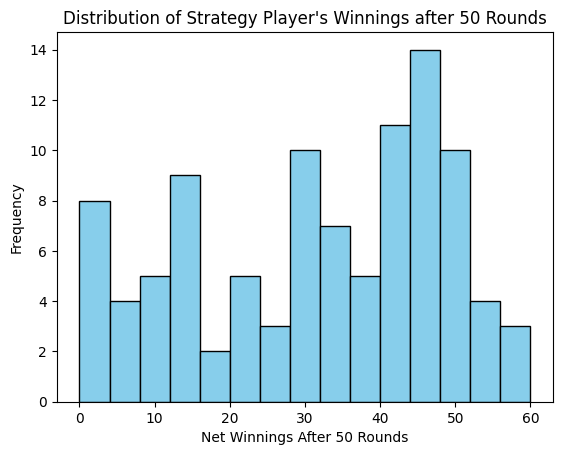

Average winnings per game (50 rounds): 31.31
Standard deviation of winnings: 16.453993436245195
Probability of net winning after 50 rounds: 0.99
Probability of net losing after 50 rounds: 0.0


In [28]:
import random
from typing import List, Optional
import matplotlib.pyplot as plt
import numpy as np

class Card:
    def __init__(self, suit: str, rank: str, value: int):
        self.suit = suit
        self.rank = rank
        self.value = value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

    def __init__(self, num_decks: int = 6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_position = None
        self.populate_deck()
        self.shuffle()

    def populate_deck(self):
        """Populate the deck with cards based on the number of decks specified."""
        self.cards.clear()  # Clear any existing cards
        for _ in range(self.num_decks):
            for suit in Deck.suits:
                for rank in Deck.ranks:
                    self.cards.append(Card(suit, rank, Deck.values[rank]))

    def shuffle(self):
        random.shuffle(self.cards)
        # Reset plastic card position after shuffle
        self.plastic_card_position = random.randint(0, len(self.cards) - 1) if self.cards else None

    def draw_card(self) -> Optional[Card]:
        """Draw a card from the deck if available, return None if deck is empty."""
        if not self.cards:  # Check if deck is empty
            print("Deck is empty; reshuffling...")
            self.populate_deck()
            self.shuffle()  # Reshuffle the deck
            # Attempt to draw again after reshuffling
        return self.cards.pop(0) if self.cards else None  # Return a card or None if still empty

    def needs_shuffle(self):
        """Determine if the deck should be shuffled based on plastic card position or if empty."""
        return not self.cards or (self.plastic_card_position is not None and len(self.cards) <= self.plastic_card_position)

    def reset_deck_if_needed(self):
        """Reset and shuffle the deck if plastic card or deck depletion is reached."""
        if not self.cards or (self.plastic_card_position is not None and len(self.cards) <= self.plastic_card_position):
            self.populate_deck()
            self.shuffle()

class Hand:
    def __init__(self):
        self.cards: List[Card] = []
        self.total_value: int = 0
        self.is_busted: bool = False
        self.is_blackjack: bool = False

    def add_card(self, card: Card):
        if card is not None:  # Check if the card is not None
            self.cards.append(card)
            self.calculate_total()
        else:
            print("Attempted to add None card to hand.")

    def calculate_total(self):
        value = sum(card.value for card in self.cards)
        num_aces = sum(1 for card in self.cards if card.rank == 'A')

        while value > 21 and num_aces:
            value -= 10
            num_aces -= 1

        self.total_value = value
        self.is_busted = value > 21
        self.is_blackjack = (len(self.cards) == 2 and value == 21)

    def __repr__(self):
        return f"Hand({self.cards}, Total={self.total_value})"

class Player:
    def __init__(self, name: str, chips: int, verbose: bool = False):
        self.name = name
        self.chips = chips
        self.hand = Hand()
        self.verbose = verbose

    def place_bet(self, amount: int) -> bool:
        if amount <= self.chips:
            self.chips -= amount
            return True
        return False

    def make_move(self, dealer_card: Card, deck: Deck):
        while self.hand.total_value < 17:
            drawn_card = deck.draw_card()
            self.hand.add_card(drawn_card)
            if self.verbose:  # Only print if verbose is True
                print(f"{self.name} draws: {drawn_card}")

    def adjust_chips(self, amount: int):
        self.chips += amount
        
class CardCountingPlayer(Player):
    def __init__(self, name: str, chips: int, count_threshold: int = -2, verbose: bool = False):
        super().__init__(name, chips, verbose) 
        self.card_count = 0  # Tracks the count of seen cards
        self.count_threshold = count_threshold  # Threshold for deciding to hit or stay

    def update_count(self, card: Card):
        """Update card count based on card values."""
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1

    def make_move(self, dealer_card: Card, deck: Deck):
        """Implements card counting strategy to decide whether to hit or stay."""
        self.update_count(dealer_card)  # Start with dealer’s visible card count

        while not self.hand.is_busted:
            if deck.needs_shuffle():
                deck.reset_deck_if_needed()  # Reshuffle deck if needed

            if self.card_count < self.count_threshold or self.hand.total_value < 17:
                drawn_card = deck.draw_card()
                if drawn_card:
                    self.hand.add_card(drawn_card)
                    self.update_count(drawn_card)
                    print(f"{self.name} draws: {drawn_card}")
                else:
                    print(f"{self.name} cannot draw a card; deck is empty.")
                    break  # Stop drawing if deck is empty
            else:
                print(f"{self.name} stays with hand: {self.hand}")
                break  # Stop drawing based on strategy

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def play_hand(self, deck: Deck):
        while self.hand.total_value < 17:
            self.hand.add_card(deck.draw_card())

class Game:
    def __init__(self, num_decks: int, players: List['Player']):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Dealer()

    def start_game(self):
        """Starts a new game by initializing hands and dealing initial cards."""
        if self.deck.needs_shuffle():
            self.deck.populate_deck()
            self.deck.shuffle()

        # Initialize hands for all players and deal two cards
        for player in self.players:
            player.hand = Hand()  # Reset player's hand
            for _ in range(2):  # Deal two cards
                player.hand.add_card(self.deck.draw_card())

        # Initialize dealer's hand and deal two cards
        self.dealer.hand = Hand()
        self.dealer.hand.add_card(self.deck.draw_card())
        self.dealer.hand.add_card(self.deck.draw_card())
        
    def play_round(self):
        for player in self.players:
            print(f"\n{player.name}'s turn:")
            player.make_move(self.dealer.hand.cards[0], self.deck)
            print(f"{player.name}'s hand: {player.hand}")

        print("\nDealer's turn:")
        self.dealer.play_hand(self.deck)
        print(f"Dealer's hand: {self.dealer.hand}")

        self.determine_winner()

    def determine_winner(self):
        dealer_total = self.dealer.hand.total_value
        print("\nResults:")
        for player in self.players:
            player_total = player.hand.total_value
            if player.hand.is_busted:
                print(f"{player.name} busted and loses.")
            elif self.dealer.hand.is_busted or player_total > dealer_total:
                print(f"{player.name} wins!")
                player.adjust_chips(2)  # Assuming bet of 1 chip
            elif player_total < dealer_total:
                print(f"{player.name} loses.")
            else:
                print(f"{player.name} pushes.")

    def reset_round(self):
        if len(self.deck.cards) <= self.deck.plastic_card_position:
            self.deck = Deck(self.deck.num_decks)  # Reset deck if plastic card reached
            self.deck.shuffle()
        for player in self.players:
            player.hand = Hand()
        self.dealer.hand = Hand()

def play_multiple_rounds(num_rounds: int):
    for round_num in range(1, num_rounds + 1):
        print(f"\n--- Round {round_num} ---")
        
        game.start_game()
        
        game.play_round()
        
        game.reset_round()

class QuietCardCountingPlayer(Player):
    def __init__(self, name: str, chips: int, count_threshold: int = -2, verbose: bool = False):
        super().__init__(name, chips)
        self.card_count = 0
        self.count_threshold = count_threshold

    def update_count(self, card: Card):
        # Adjust count based on the drawn card's rank
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1

    def make_move(self, dealer_card: Card, deck: Deck):
        # Update count based on the dealer's visible card
        self.update_count(dealer_card)
        
        # Continue drawing based on both count and hand total, but stop if total is 17 or higher
        while not self.hand.is_busted:
            if self.card_count < self.count_threshold or self.hand.total_value < 17:
                drawn_card = deck.draw_card()
                self.hand.add_card(drawn_card)
                self.update_count(drawn_card)
                #print(f"{self.name} draws: {drawn_card}")
            else:
                #print(f"{self.name} stays with hand: {self.hand}")
                break

        #if self.hand.is_busted
            #print(f"{self.name} busts with hand: {self.hand}")
                
class QuietGame(Game):
    def __init__(self, num_decks: int, players: List[Player], verbose: bool = False):
        super().__init__(num_decks, players)
        self.verbose = verbose

    def play_round(self):
        if self.verbose:
            print("\n--- New Round ---")
        
        # Ensure dealer has cards before accessing
        if len(self.dealer.hand.cards) == 0:
            self.start_game()
        
        for player in self.players:
            player.make_move(self.dealer.hand.cards[0], self.deck)

        self.dealer.play_hand(self.deck)

        if self.verbose:
            print(f"\nDealer's hand: {self.dealer.hand}")
        
        self.determine_winner()

    def determine_winner(self):
        dealer_total = self.dealer.hand.total_value
        for player in self.players:
            if player.hand.is_busted:
                continue
            elif self.dealer.hand.is_busted or player.hand.total_value > dealer_total:
                player.adjust_chips(2)  # Assuming 1-chip bets with 2-chip payout on wins
            elif player.hand.total_value == dealer_total:
                player.adjust_chips(1)  # Push, player gets bet back

    def compute_winnings(self, player: Player):
        return player.chips - 100  # Assuming all players start with 100 chips


# Set up the game with 1 CardCountingPlayer and 3 regular players
strategy_player = QuietCardCountingPlayer(name="Strat_P1", chips=100, count_threshold=-2)
regular_players = [Player(name=f"Player1 {i+1}", chips=100) for i in range(3)]

# Simulation settings
num_games = 100
rounds_per_game = 50
initial_chips = 100

# Track winnings for each game
winnings_list = []

# Run 100 games
for game_num in range(num_games):
    # Set up a game with 1 strategy player and 3 regular players
    strategy_player = QuietCardCountingPlayer(name="Strat_P1", chips=initial_chips, count_threshold=-2)
    regular_players = [Player(name=f"Player{i+1}", chips=initial_chips) for i in range(3)]
    
    # Initialize the game
    game = QuietGame(num_decks=6, players=[strategy_player] + regular_players, verbose=False)
    
    # Play 50 rounds or until the strategy player is out of money
    for _ in range(rounds_per_game):
        if strategy_player.chips <= 0:
            break
        game.start_game()
        game.play_round()
        game.reset_round()
    
    # Record the final chips of the strategy player
    winnings = strategy_player.chips - initial_chips  # Net gain or loss
    winnings_list.append(winnings)

# Calculate average winnings per round and standard deviation
average_winnings = np.mean(winnings_list)
std_dev_winnings = np.std(winnings_list)

# Calculate probability of net winning or losing after 50 rounds
probability_winning = sum(1 for w in winnings_list if w > 0) / num_games
probability_losing = sum(1 for w in winnings_list if w < 0) / num_games

# Plot histogram of winnings
plt.hist(winnings_list, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Net Winnings After 50 Rounds')
plt.ylabel('Frequency')
plt.title('Distribution of Strategy Player\'s Winnings after 50 Rounds')
plt.show()

# Print results
print(f"Average winnings per game (50 rounds): {average_winnings}")
print(f"Standard deviation of winnings: {std_dev_winnings}")
print(f"Probability of net winning after 50 rounds: {probability_winning}")
print(f"Probability of net losing after 50 rounds: {probability_losing}")



In [ ]:
Q.9
The Optimal threshold is -3 from original


Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Threshold: -3
Average winnings per game: 35.93
Standard deviation of winnings: 15.22
Probability of net winning: 1.00
Probability of net losing: 0.00

Threshold: -2
Average winnings per game

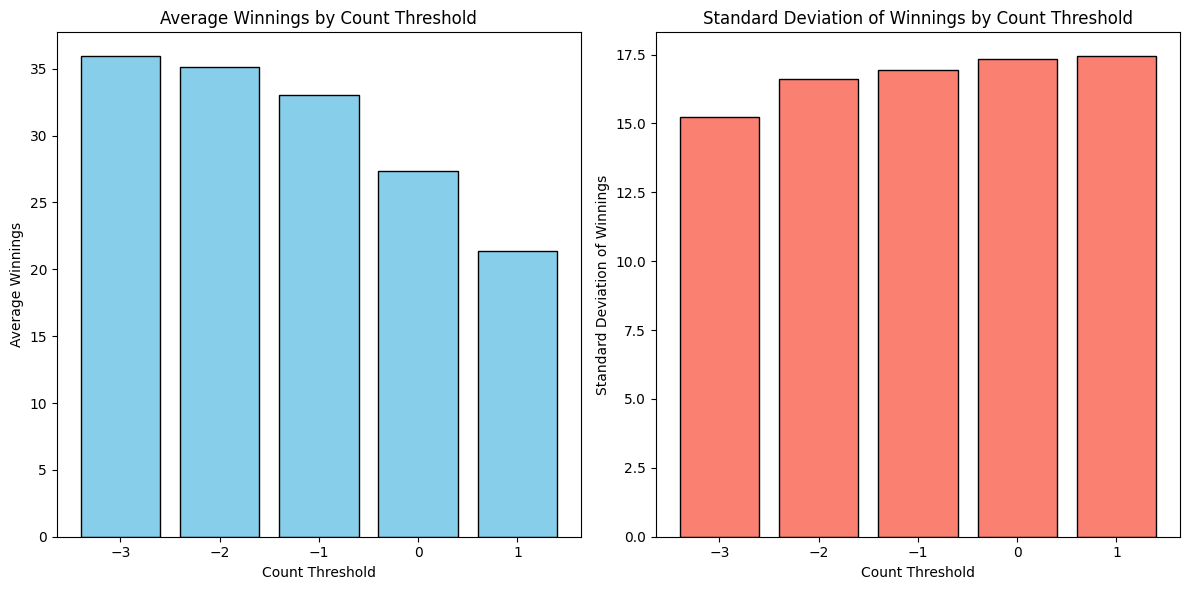

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the threshold values to test
threshold_values = [-3, -2, -1, 0, 1]

# Simulation settings
num_games = 100
rounds_per_game = 50
initial_chips = 100

# Store results for each threshold
results = {}

# Loop through each threshold value
for threshold in threshold_values:
    winnings_list = []

    for game_num in range(num_games):
        strategy_player = QuietCardCountingPlayer(name="Strat_P1", chips=initial_chips, count_threshold=threshold, verbose=False)
        regular_players = [Player(name=f"Player{i+1}", chips=initial_chips, verbose=False) for i in range(3)]
        game = QuietGame(num_decks=6, players=[strategy_player] + regular_players, verbose=False)
        
        for _ in range(rounds_per_game):
            if strategy_player.chips <= 0:
                break
            game.start_game()
            game.play_round()
            game.reset_round()
        
        winnings = strategy_player.chips - initial_chips  # Net gain or loss
        winnings_list.append(winnings)


    # Calculate average winnings, standard deviation, and probabilities
    average_winnings = np.mean(winnings_list)
    std_dev_winnings = np.std(winnings_list)
    probability_winning = sum(1 for w in winnings_list if w > 0) / num_games
    probability_losing = sum(1 for w in winnings_list if w < 0) / num_games

    # Store results
    results[threshold] = {
        'average_winnings': average_winnings,
        'std_dev_winnings': std_dev_winnings,
        'probability_winning': probability_winning,
        'probability_losing': probability_losing,
        'winnings_list': winnings_list
    }

# Print results for each threshold
for threshold, result in results.items():
    print(f"Threshold: {threshold}")
    print(f"Average winnings per game: {result['average_winnings']:.2f}")
    print(f"Standard deviation of winnings: {result['std_dev_winnings']:.2f}")
    print(f"Probability of net winning: {result['probability_winning']:.2f}")
    print(f"Probability of net losing: {result['probability_losing']:.2f}\n")

# Plot the results
thresholds = list(results.keys())
average_winnings = [results[t]['average_winnings'] for t in thresholds]
std_dev_winnings = [results[t]['std_dev_winnings'] for t in thresholds]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(thresholds, average_winnings, color='skyblue', edgecolor='black')
plt.xlabel('Count Threshold')
plt.ylabel('Average Winnings')
plt.title('Average Winnings by Count Threshold')

plt.subplot(1, 2, 2)
plt.bar(thresholds, std_dev_winnings, color='salmon', edgecolor='black')
plt.xlabel('Count Threshold')
plt.ylabel('Standard Deviation of Winnings')
plt.title('Standard Deviation of Winnings by Count Threshold')

plt.tight_layout()
plt.show()


In [ ]:
Q.10

In [32]:
import random
from typing import List, Optional
import matplotlib.pyplot as plt
import numpy as np

class Card:
    def __init__(self, suit: str, rank: str, value: int):
        self.suit = suit
        self.rank = rank
        self.value = value

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

    def __init__(self, num_decks: int = 6):
        self.num_decks = num_decks
        self.cards = []
        self.plastic_card_position = None
        self.populate_deck()
        self.shuffle()

    def populate_deck(self):
        """Populate the deck with cards based on the number of decks specified."""
        self.cards.clear()  # Clear any existing cards
        for _ in range(self.num_decks):
            for suit in Deck.suits:
                for rank in Deck.ranks:
                    self.cards.append(Card(suit, rank, Deck.values[rank]))

    def shuffle(self):
        random.shuffle(self.cards)
        # Reset plastic card position after shuffle
        self.plastic_card_position = random.randint(0, len(self.cards) - 1) if self.cards else None

    def draw_card(self) -> Optional[Card]:
        """Draw a card from the deck if available, return None if deck is empty."""
        if not self.cards:  # Check if deck is empty
            print("Deck is empty; reshuffling...")
            self.populate_deck()
            self.shuffle()  # Reshuffle the deck
            # Attempt to draw again after reshuffling
        return self.cards.pop(0) if self.cards else None  # Return a card or None if still empty

    def needs_shuffle(self):
        """Determine if the deck should be shuffled based on plastic card position or if empty."""
        return not self.cards or (self.plastic_card_position is not None and len(self.cards) <= self.plastic_card_position)

    def reset_deck_if_needed(self):
        """Reset and shuffle the deck if plastic card or deck depletion is reached."""
        if not self.cards or (self.plastic_card_position is not None and len(self.cards) <= self.plastic_card_position):
            self.populate_deck()
            self.shuffle()

class Hand:
    def __init__(self):
        self.cards: List[Card] = []
        self.total_value: int = 0
        self.is_busted: bool = False
        self.is_blackjack: bool = False

    def add_card(self, card: Card):
        if card is not None:  # Check if the card is not None
            self.cards.append(card)
            self.calculate_total()
        else:
            print("Attempted to add None card to hand.")

    def calculate_total(self):
        value = sum(card.value for card in self.cards)
        num_aces = sum(1 for card in self.cards if card.rank == 'A')

        while value > 21 and num_aces:
            value -= 10
            num_aces -= 1

        self.total_value = value
        self.is_busted = value > 21
        self.is_blackjack = (len(self.cards) == 2 and value == 21)

    def __repr__(self):
        return f"Hand({self.cards}, Total={self.total_value})"

class Player:
    def __init__(self, name: str, chips: int, verbose: bool = False):
        self.name = name
        self.chips = chips
        self.hand = Hand()
        self.verbose = verbose

    def place_bet(self, amount: int) -> bool:
        if amount <= self.chips:
            self.chips -= amount
            return True
        return False

    def make_move(self, dealer_card: Card, deck: Deck):
        while self.hand.total_value < 17:
            drawn_card = deck.draw_card()
            self.hand.add_card(drawn_card)
            if self.verbose:  # Only print if verbose is True
                print(f"{self.name} draws: {drawn_card}")

    def adjust_chips(self, amount: int):
        self.chips += amount
        
class CardCountingPlayer(Player):
    def __init__(self, name: str, chips: int, count_threshold: int = -2, verbose: bool = False):
        super().__init__(name, chips, verbose) 
        self.card_count = 0  # Tracks the count of seen cards
        self.count_threshold = count_threshold  # Threshold for deciding to hit or stay

    def update_count(self, card: Card):
        """Update card count based on card values."""
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1

    def make_move(self, dealer_card: Card, deck: Deck):
        """Implements card counting strategy to decide whether to hit or stay."""
        self.update_count(dealer_card)  # Start with dealer’s visible card count

        while not self.hand.is_busted:
            if deck.needs_shuffle():
                deck.reset_deck_if_needed()  # Reshuffle deck if needed

            if self.card_count < self.count_threshold or self.hand.total_value < 17:
                drawn_card = deck.draw_card()
                if drawn_card:
                    self.hand.add_card(drawn_card)
                    self.update_count(drawn_card)
                    print(f"{self.name} draws: {drawn_card}")
                else:
                    print(f"{self.name} cannot draw a card; deck is empty.")
                    break  # Stop drawing if deck is empty
            else:
                print(f"{self.name} stays with hand: {self.hand}")
                break  # Stop drawing based on strategy

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def play_hand(self, deck: Deck):
        while self.hand.total_value < 17:
            self.hand.add_card(deck.draw_card())

class Game:
    def __init__(self, num_decks: int, players: List['Player']):
        self.deck = Deck(num_decks)
        self.players = players
        self.dealer = Dealer()

    def start_game(self):
        """Starts a new game by initializing hands and dealing initial cards."""
        if self.deck.needs_shuffle():
            self.deck.populate_deck()
            self.deck.shuffle()

        # Initialize hands for all players and deal two cards
        for player in self.players:
            player.hand = Hand()  # Reset player's hand
            for _ in range(2):  # Deal two cards
                player.hand.add_card(self.deck.draw_card())

        # Initialize dealer's hand and deal two cards
        self.dealer.hand = Hand()
        self.dealer.hand.add_card(self.deck.draw_card())
        self.dealer.hand.add_card(self.deck.draw_card())
        
    def play_round(self):
        for player in self.players:
            print(f"\n{player.name}'s turn:")
            player.make_move(self.dealer.hand.cards[0], self.deck)
            print(f"{player.name}'s hand: {player.hand}")

        print("\nDealer's turn:")
        self.dealer.play_hand(self.deck)
        print(f"Dealer's hand: {self.dealer.hand}")

        self.determine_winner()

    def determine_winner(self):
        dealer_total = self.dealer.hand.total_value
        print("\nResults:")
        for player in self.players:
            player_total = player.hand.total_value
            if player.hand.is_busted:
                print(f"{player.name} busted and loses.")
            elif self.dealer.hand.is_busted or player_total > dealer_total:
                print(f"{player.name} wins!")
                player.adjust_chips(2)  # Assuming bet of 1 chip
            elif player_total < dealer_total:
                print(f"{player.name} loses.")
            else:
                print(f"{player.name} pushes.")

    def reset_round(self):
        if len(self.deck.cards) <= self.deck.plastic_card_position:
            self.deck = Deck(self.deck.num_decks)  # Reset deck if plastic card reached
            self.deck.shuffle()
        for player in self.players:
            player.hand = Hand()
        self.dealer.hand = Hand()

def play_multiple_rounds(num_rounds: int):
    for round_num in range(1, num_rounds + 1):
        print(f"\n--- Round {round_num} ---")
        
        game.start_game()
        
        game.play_round()
        
        game.reset_round()

class ModifiedStrategyPlayer(Player):
    def __init__(self, name: str, chips: int, count_threshold: int = -2, stay_threshold: int = 15):
        super().__init__(name, chips)
        self.card_count = 0
        self.count_threshold = count_threshold
        self.stay_threshold = stay_threshold  # New stay threshold to differentiate strategy

    def update_count(self, card: Card):
        # Adjust count based on the drawn card's rank
        if card.rank in ['2', '3', '4', '5', '6']:
            self.card_count += 1
        elif card.rank in ['10', 'J', 'Q', 'K', 'A']:
            self.card_count -= 1

    def make_move(self, dealer_card: Card, deck: Deck):
        # Update count based on the dealer's visible card
        self.update_count(dealer_card)
        
        # Continue drawing based on count and stay_threshold, with no print statements
        while not self.hand.is_busted:
            if self.card_count < self.count_threshold or self.hand.total_value < self.stay_threshold:
                drawn_card = deck.draw_card()
                self.hand.add_card(drawn_card)
                self.update_count(drawn_card)
            else:
                break  # Player stays when above stay_threshold or within count threshold

                
class QuietGame(Game):
    def __init__(self, num_decks: int, players: List[Player], verbose: bool = False):
        super().__init__(num_decks, players)
        self.verbose = verbose

    def play_round(self):
        if self.verbose:
            print("\n--- New Round ---")
        
        # Ensure dealer has cards before accessing
        if len(self.dealer.hand.cards) == 0:
            self.start_game()
        
        for player in self.players:
            player.make_move(self.dealer.hand.cards[0], self.deck)

        self.dealer.play_hand(self.deck)

        if self.verbose:
            print(f"\nDealer's hand: {self.dealer.hand}")
        
        self.determine_winner()

    def determine_winner(self):
        dealer_total = self.dealer.hand.total_value
        for player in self.players:
            if player.hand.is_busted:
                continue
            elif self.dealer.hand.is_busted or player.hand.total_value > dealer_total:
                player.adjust_chips(2)  # Assuming 1-chip bets with 2-chip payout on wins
            elif player.hand.total_value == dealer_total:
                player.adjust_chips(1)  # Push, player gets bet back

    def compute_winnings(self, player: Player):
        return player.chips - 100  # Assuming all players start with 100 chips


def run_simulations_for_strategies(num_games: int = 100, rounds_per_game: int = 50, initial_chips: int = 100):
    winnings_comparison = {}

    for strategy_name, player_class in [("Modified Strategy", ModifiedStrategyPlayer), ("Original Strategy", QuietCardCountingPlayer)]:
        winnings_list = []

        for game_num in range(num_games):
            strategy_player = player_class(name="Strat_P1", chips=initial_chips)
            regular_players = [Player(name=f"Player{i+1}", chips=initial_chips) for i in range(3)]
            game = QuietGame(num_decks=6, players=[strategy_player] + regular_players, verbose=False)

            for _ in range(rounds_per_game):
                if strategy_player.chips <= 0:
                    break
                game.start_game()
                game.play_round()
                game.reset_round()

            winnings = strategy_player.chips - initial_chips  # Net gain or loss
            winnings_list.append(winnings)

        # Calculate average winnings for the strategy
        average_winnings = np.mean(winnings_list)
        winnings_comparison[strategy_name] = average_winnings

    return winnings_comparison

# Run the simulations
results = run_simulations_for_strategies()

# Print the comparison results
for strategy, avg_winnings in results.items():
    print(f"{strategy}: Average Winnings = {avg_winnings:.2f}")


Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Deck is empty; reshuffling...
Modified Strategy: Average Winnings = 35.85
Original Strategy: Average Winnings = 33.12


You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [ ]:
Modified strategy has a higher average of winning. It is better to stay at a lower threshold, at least to 15.